## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9552519	total: 47.7ms	remaining: 47.6s
1:	learn: 0.9338329	total: 48.7ms	remaining: 24.3s
2:	learn: 0.9139026	total: 49.6ms	remaining: 16.5s
3:	learn: 0.8982139	total: 50.6ms	remaining: 12.6s
4:	learn: 0.8818099	total: 51.5ms	remaining: 10.2s
5:	learn: 0.8643026	total: 52.3ms	remaining: 8.66s
6:	learn: 0.8465512	total: 53.2ms	remaining: 7.54s
7:	learn: 0.8298963	total: 54ms	remaining: 6.7s
8:	learn: 0.8144392	total: 54.9ms	remaining: 6.05s
9:	learn: 0.7980961	total: 55.8ms	remaining: 5.53s
10:	learn: 0.7825447	total: 56.8ms	remaining: 5.11s
11:	learn: 0.7695984	total: 57.6ms	remaining: 4.74s
12:	learn: 0.7548794	total: 58.4ms	remaining: 4.43s
13:	learn: 0.7397262	total: 59.3ms	remaining: 4.17s
14:	learn: 0.7258509	total: 60ms	remaining: 3.94s
15:	learn: 0.7117496	total: 60.8ms	remaining: 3.74s
16:	learn: 0.6991015	total: 61.7ms	remaining: 3.56s
17:	learn: 0.6882907	total: 62.6ms	remaining: 3.41s
18:	learn: 0.6759063	total: 63.6ms	remaining: 3.28

115:	learn: 0.2857715	total: 147ms	remaining: 1.12s
116:	learn: 0.2845383	total: 148ms	remaining: 1.11s
117:	learn: 0.2832368	total: 148ms	remaining: 1.11s
118:	learn: 0.2818976	total: 149ms	remaining: 1.1s
119:	learn: 0.2809254	total: 150ms	remaining: 1.1s
120:	learn: 0.2800367	total: 151ms	remaining: 1.1s
121:	learn: 0.2789509	total: 152ms	remaining: 1.09s
122:	learn: 0.2779970	total: 153ms	remaining: 1.09s
123:	learn: 0.2769622	total: 154ms	remaining: 1.09s
124:	learn: 0.2757191	total: 157ms	remaining: 1.1s
125:	learn: 0.2744399	total: 159ms	remaining: 1.1s
126:	learn: 0.2732099	total: 160ms	remaining: 1.1s
127:	learn: 0.2724269	total: 161ms	remaining: 1.09s
128:	learn: 0.2713452	total: 162ms	remaining: 1.09s
129:	learn: 0.2700454	total: 163ms	remaining: 1.09s
130:	learn: 0.2686346	total: 164ms	remaining: 1.08s
131:	learn: 0.2680319	total: 165ms	remaining: 1.08s
132:	learn: 0.2672805	total: 165ms	remaining: 1.08s
133:	learn: 0.2664974	total: 166ms	remaining: 1.07s
134:	learn: 0.2651

272:	learn: 0.1901232	total: 284ms	remaining: 757ms
273:	learn: 0.1896736	total: 285ms	remaining: 755ms
274:	learn: 0.1893767	total: 286ms	remaining: 754ms
275:	learn: 0.1892473	total: 287ms	remaining: 752ms
276:	learn: 0.1890514	total: 288ms	remaining: 751ms
277:	learn: 0.1886103	total: 288ms	remaining: 749ms
278:	learn: 0.1880605	total: 289ms	remaining: 748ms
279:	learn: 0.1875037	total: 290ms	remaining: 746ms
280:	learn: 0.1869139	total: 291ms	remaining: 745ms
281:	learn: 0.1862407	total: 292ms	remaining: 743ms
282:	learn: 0.1860846	total: 293ms	remaining: 742ms
283:	learn: 0.1857577	total: 294ms	remaining: 740ms
284:	learn: 0.1856555	total: 294ms	remaining: 738ms
285:	learn: 0.1855511	total: 295ms	remaining: 737ms
286:	learn: 0.1853887	total: 296ms	remaining: 736ms
287:	learn: 0.1848494	total: 297ms	remaining: 734ms
288:	learn: 0.1847711	total: 298ms	remaining: 733ms
289:	learn: 0.1842179	total: 299ms	remaining: 731ms
290:	learn: 0.1838486	total: 300ms	remaining: 730ms
291:	learn: 

428:	learn: 0.1406440	total: 419ms	remaining: 558ms
429:	learn: 0.1403060	total: 421ms	remaining: 557ms
430:	learn: 0.1400390	total: 421ms	remaining: 556ms
431:	learn: 0.1400105	total: 422ms	remaining: 555ms
432:	learn: 0.1397818	total: 423ms	remaining: 554ms
433:	learn: 0.1395654	total: 424ms	remaining: 553ms
434:	learn: 0.1392955	total: 425ms	remaining: 552ms
435:	learn: 0.1392570	total: 426ms	remaining: 551ms
436:	learn: 0.1390285	total: 427ms	remaining: 550ms
437:	learn: 0.1388577	total: 427ms	remaining: 548ms
438:	learn: 0.1385197	total: 428ms	remaining: 547ms
439:	learn: 0.1382327	total: 429ms	remaining: 546ms
440:	learn: 0.1378292	total: 430ms	remaining: 545ms
441:	learn: 0.1375123	total: 431ms	remaining: 544ms
442:	learn: 0.1373986	total: 432ms	remaining: 543ms
443:	learn: 0.1370911	total: 433ms	remaining: 542ms
444:	learn: 0.1368042	total: 433ms	remaining: 541ms
445:	learn: 0.1364504	total: 434ms	remaining: 540ms
446:	learn: 0.1361244	total: 435ms	remaining: 538ms
447:	learn: 

590:	learn: 0.1070649	total: 556ms	remaining: 385ms
591:	learn: 0.1068836	total: 557ms	remaining: 384ms
592:	learn: 0.1066804	total: 558ms	remaining: 383ms
593:	learn: 0.1064326	total: 559ms	remaining: 382ms
594:	learn: 0.1061617	total: 560ms	remaining: 381ms
595:	learn: 0.1058793	total: 561ms	remaining: 380ms
596:	learn: 0.1057475	total: 562ms	remaining: 379ms
597:	learn: 0.1055089	total: 562ms	remaining: 378ms
598:	learn: 0.1054944	total: 563ms	remaining: 377ms
599:	learn: 0.1054776	total: 564ms	remaining: 376ms
600:	learn: 0.1053836	total: 565ms	remaining: 375ms
601:	learn: 0.1052018	total: 566ms	remaining: 374ms
602:	learn: 0.1051815	total: 567ms	remaining: 373ms
603:	learn: 0.1050212	total: 568ms	remaining: 372ms
604:	learn: 0.1050063	total: 568ms	remaining: 371ms
605:	learn: 0.1047021	total: 569ms	remaining: 370ms
606:	learn: 0.1045730	total: 570ms	remaining: 369ms
607:	learn: 0.1044408	total: 571ms	remaining: 368ms
608:	learn: 0.1042427	total: 572ms	remaining: 367ms
609:	learn: 

747:	learn: 0.0837792	total: 690ms	remaining: 233ms
748:	learn: 0.0836355	total: 692ms	remaining: 232ms
749:	learn: 0.0835791	total: 693ms	remaining: 231ms
750:	learn: 0.0835470	total: 694ms	remaining: 230ms
751:	learn: 0.0834983	total: 694ms	remaining: 229ms
752:	learn: 0.0833124	total: 695ms	remaining: 228ms
753:	learn: 0.0830836	total: 696ms	remaining: 227ms
754:	learn: 0.0829081	total: 697ms	remaining: 226ms
755:	learn: 0.0828483	total: 698ms	remaining: 225ms
756:	learn: 0.0828376	total: 698ms	remaining: 224ms
757:	learn: 0.0827819	total: 699ms	remaining: 223ms
758:	learn: 0.0826290	total: 700ms	remaining: 222ms
759:	learn: 0.0824876	total: 701ms	remaining: 221ms
760:	learn: 0.0824375	total: 702ms	remaining: 220ms
761:	learn: 0.0823707	total: 703ms	remaining: 219ms
762:	learn: 0.0822714	total: 703ms	remaining: 218ms
763:	learn: 0.0820610	total: 704ms	remaining: 218ms
764:	learn: 0.0819236	total: 705ms	remaining: 217ms
765:	learn: 0.0816718	total: 706ms	remaining: 216ms
766:	learn: 

913:	learn: 0.0660642	total: 828ms	remaining: 77.9ms
914:	learn: 0.0659797	total: 829ms	remaining: 77ms
915:	learn: 0.0658684	total: 830ms	remaining: 76.1ms
916:	learn: 0.0657518	total: 831ms	remaining: 75.2ms
917:	learn: 0.0656246	total: 831ms	remaining: 74.3ms
918:	learn: 0.0655529	total: 832ms	remaining: 73.3ms
919:	learn: 0.0654219	total: 833ms	remaining: 72.4ms
920:	learn: 0.0652442	total: 834ms	remaining: 71.5ms
921:	learn: 0.0652220	total: 835ms	remaining: 70.6ms
922:	learn: 0.0650982	total: 836ms	remaining: 69.7ms
923:	learn: 0.0650579	total: 836ms	remaining: 68.8ms
924:	learn: 0.0649755	total: 837ms	remaining: 67.9ms
925:	learn: 0.0647835	total: 838ms	remaining: 67ms
926:	learn: 0.0646634	total: 839ms	remaining: 66.1ms
927:	learn: 0.0644483	total: 840ms	remaining: 65.2ms
928:	learn: 0.0643354	total: 841ms	remaining: 64.2ms
929:	learn: 0.0642182	total: 842ms	remaining: 63.3ms
930:	learn: 0.0640849	total: 842ms	remaining: 62.4ms
931:	learn: 0.0639543	total: 843ms	remaining: 61.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

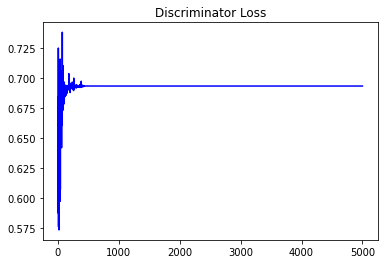

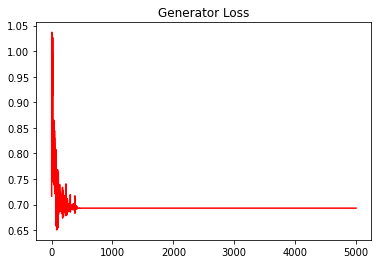

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

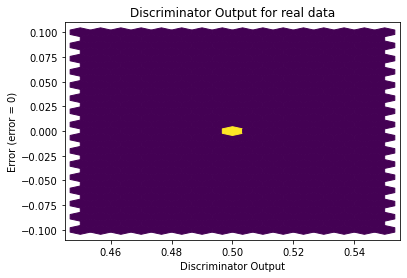

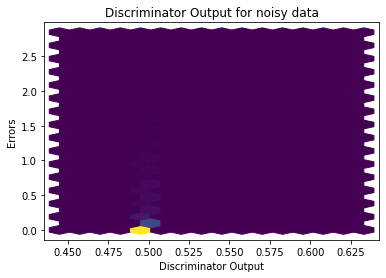

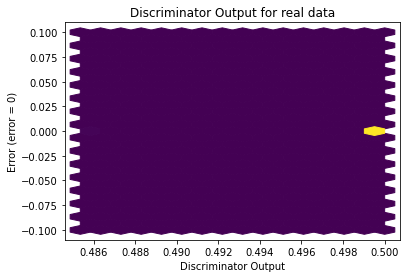

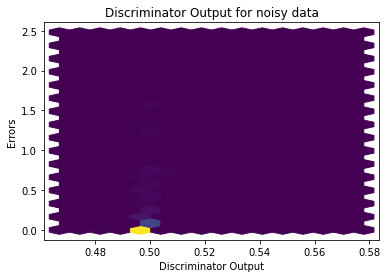

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


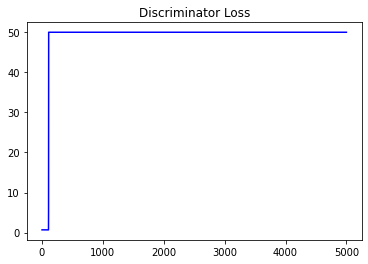

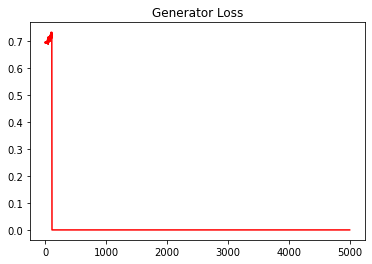

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

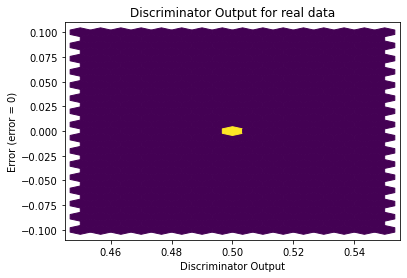

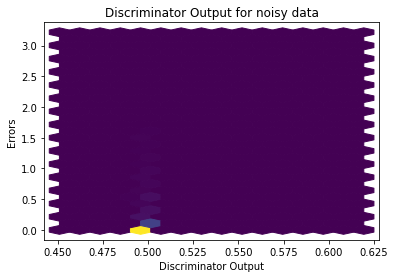

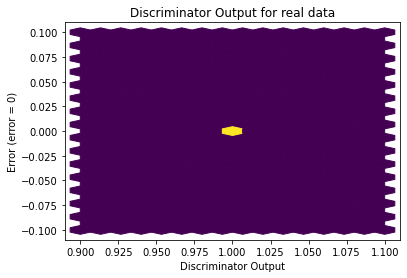

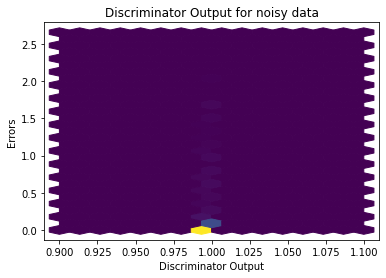

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2322]], device='cuda:0', requires_grad=True)
